# Convolution Neural Network : MNIST Classifier

CNNs preserve the **spatial structure** of images instead of flattening pixels into a 1D vector (like FNNs), they process the full 2D grid, so neighbouring pixels stay neighbours.
- **Convolutional filters** (small kernels(filters)) slide across the image, detecting local patterns edges, curves, corners by computing weighted sums of nearby pixel regions.
- Stacking multiple conv layers builds a **feature hierarchy**: early filters find simpler features while later layers extract complex features.
- **MaxPooling** shrinks the spatial dimensions progressively while highlighting the most important features.
- Later layers are a FNN, data is flattened and processed.

This spatial awareness is why CNNs vastly outperform flat networks on image tasks, they exploit the fact that pixels near each other are more related than distant ones.

In [131]:
!pip install tensorflow

## Load MNIST Dataset: Digit Classifier

In [119]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

print("="*20)
print("First training example")
print(x_train[0])
print(y_train[0])

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
First training example
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0 

## Reshape and Normalise input data
Input data already has a shape of (28,28), but is missing a dimension for channel. Since this data set has grayscale images, channel=1. We reshape it to (28,28,1)

In [120]:
import keras.backend as k

print(x_train.shape)

img_rows = x_train.shape[1]
img_cols = x_train.shape[2]
channels = 1

if k.image_data_format() == 'channels_first':
    img_shape = (channels, img_rows, img_cols)
    # Reshape to (28, 28, 1) for Conv2D and normalize to [0, 1]
    x_train = x_train.reshape(x_train.shape[0], channels, img_rows, img_cols).astype('float32') / 255.0
    x_test = x_test.reshape(x_test.shape[0], channels, img_rows, img_cols).astype('float32') / 255.0
else:
    # Reshape to (28, 28, 1) for Conv2D and normalize to [0, 1]
    img_shape = (img_rows, img_cols, channels)
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, channels).astype('float32') / 255.0
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, channels).astype('float32') / 255.0

print(x_train.shape, x_test.shape)

(60000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


## One-hot encode the labels

Represent the labels as one-hot encodeing. example: 
</br>y = 1 is represented as [0,1,0,0,0,0,0,0,0]
</br>y = 2 is represented as [0,0,1,0,0,0,0,0,0]
</br>...
</br>y = 9 is represented as [0,0,0,0,0,0,0,0,1]

In [121]:
y_train = pd.get_dummies(y_train).astype(int).values
y_test = pd.get_dummies(y_test).astype(int).values

print(y_train.shape, y_test.shape)

print("="*20)
print("First training label after one-hot encoding")
print(y_train[0])

(60000, 10) (10000, 10)
First training label after one-hot encoding
[0 0 0 0 0 1 0 0 0 0]


# CNN Model

In [122]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential()

model.add(Conv2D(filters=32,
                 kernel_size=(3, 3), 
                 activation='relu', 
                 strides=1, 
                 padding='same',
                 input_shape=img_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32,
                 kernel_size=(3, 3), 
                 activation='relu', 
                 strides=1, 
                 padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])
              
model.summary(show_trainable=True)

/opt/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ conv2d_34 (Conv2D)          │ (None, 28, 28, 32)    │        320 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ max_pooling2d_29            │ (None, 14, 14, 32)    │          0 │   -   │
│ (MaxPooling2D)              │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv2d_35 (Conv2D)          │ (None, 14, 14, 32)    │      9,248 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ max_pooling2d_30            │ (None, 7, 7, 32)      │          0 │   -   │
│ (MaxPooling2D)              │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dropout_42 (Dropout)        │ (None, 7, 7, 32)      │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ flatten_21 (Flatten)        │ (None, 1568)          │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_42 (Dense)            │ (None, 128)           │    200,832 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dropout_43 (Dropout)        │ (None, 128)           │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_43 (Dense)            │ (None, 10)            │      1,290 │   Y   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 211,690 (826.91 KB)

 Trainable params: 211,690 (826.91 KB)

 Non-trainable params: 0 (0.00 B)

In [123]:
model.fit(x_train, y_train, epochs=12, batch_size=128, validation_split=0.2, verbose=1)

Epoch 1/12
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.8735 - loss: 0.4013 - val_accuracy: 0.9743 - val_loss: 0.0898
Epoch 2/12
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9601 - loss: 0.1316 - val_accuracy: 0.9814 - val_loss: 0.0619
Epoch 3/12
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9693 - loss: 0.1000 - val_accuracy: 0.9856 - val_loss: 0.0512
Epoch 4/12
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9727 - loss: 0.0872 - val_accuracy: 0.9858 - val_loss: 0.0512
Epoch 5/12
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.9771 - loss: 0.0747 - val_accuracy: 0.9860 - val_loss: 0.0425
Epoch 6/12
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9807 - loss: 0.0655 - val_accuracy: 0.9886 - val_loss: 0.0408
Epoch 7/12
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9818 - loss: 0.0599 - val_accuracy: 0.9892 - val_loss: 0.0394
Epoch 8/12
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9823 - loss: 0.0563 - 

## Evaluate the mode on test data

In [124]:
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=100, verbose=1)
print("test loss, test acc:", results)

Evaluate on test data
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9926 - loss: 0.0231
test loss, test acc: [0.023076754063367844, 0.9926000237464905]


## Mislabelled data samples

100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Total misclassified: 74 / 10000 (0.74%)



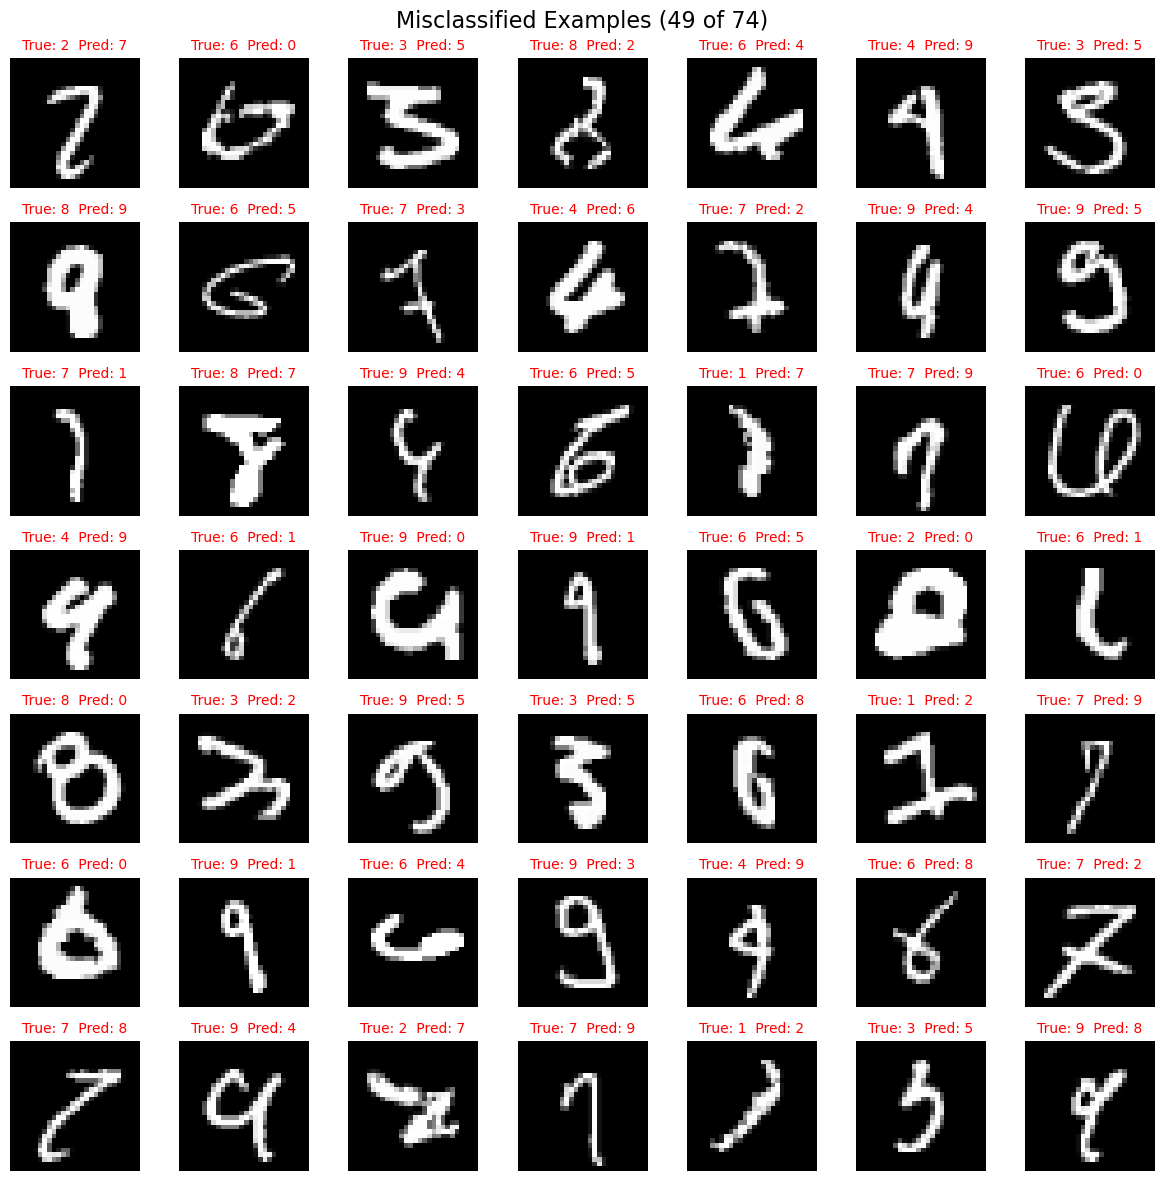

In [125]:
import numpy as np
import matplotlib.pyplot as plt

# Get predictions
predictions = model.predict(x_test, batch_size=100, verbose=1)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Find incorrect predictions
incorrect_idx = np.where(predicted_labels != true_labels)[0]
print(f"Total misclassified: {len(incorrect_idx)} / {len(y_test)} ({len(incorrect_idx)/len(y_test)*100:.2f}%)\n")

# Display a sample of misclassified images
num_display = min(49, len(incorrect_idx))
fig, axes = plt.subplots(7, 7, figsize=(12, 12))
fig.suptitle(f"Misclassified Examples ({num_display} of {len(incorrect_idx)})", fontsize=16)

for i, ax in enumerate(axes.flat):
    if i < num_display:
        idx = incorrect_idx[i]
        img = x_test[idx].reshape(28, 28)
        ax.imshow(img, cmap='gray')
        ax.set_title(f"True: {true_labels[idx]}  Pred: {predicted_labels[idx]}", color='red', fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.show()

## Analyse how each layer contributes to the prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
True label: 5, Predicted label: 9


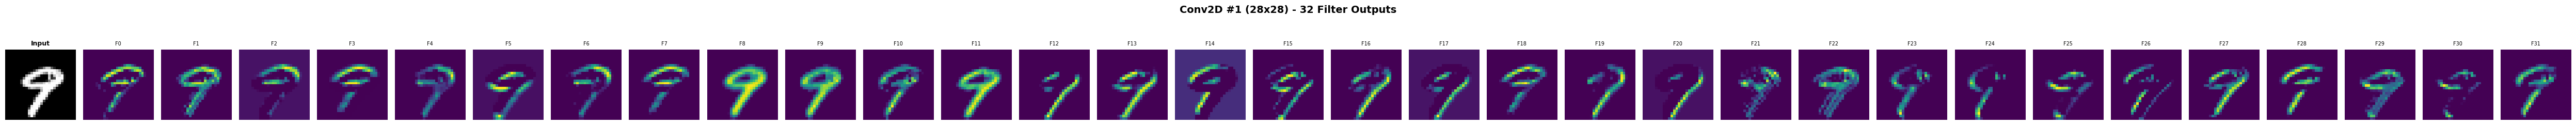

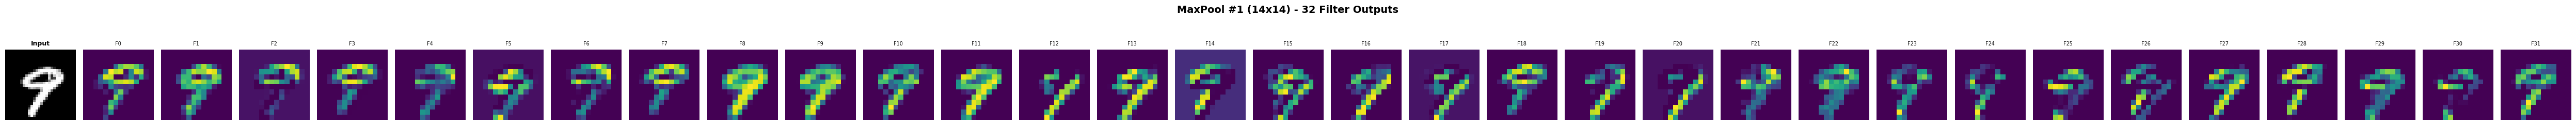

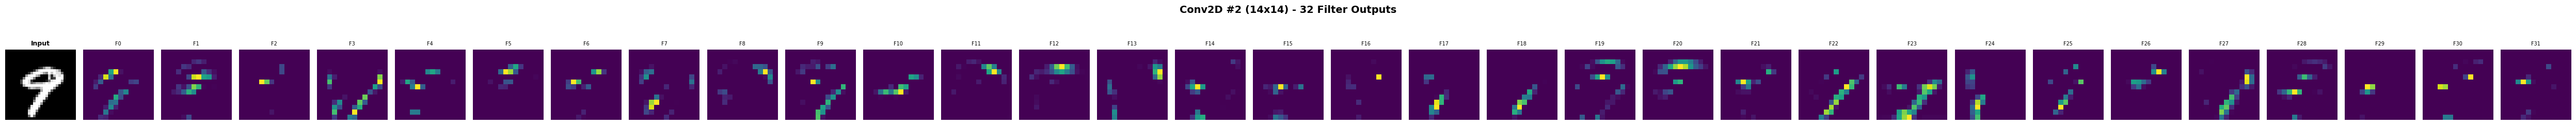

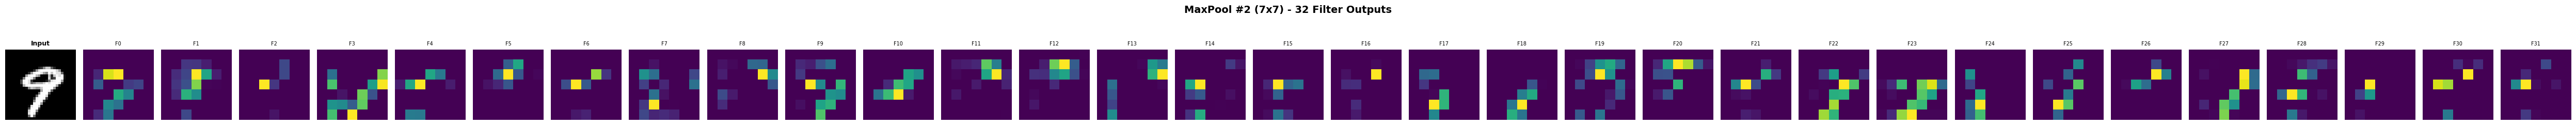

In [126]:
import matplotlib.pyplot as plt
import numpy as np

# Pick a sample image
sample_img = x_test[9:10]
sample_pred = model.predict(sample_img)
predicted_label = np.argmax(sample_pred, axis=1)[0]
true_label = np.argmax(y_test[8:9], axis=1)[0]
print(f"True label: {true_label}, Predicted label: {predicted_label}")

layer_names = ['Conv2D #1 (28x28)', 'MaxPool #1 (14x14)', 'Conv2D #2 (14x14)', 'MaxPool #2 (7x7)']

# One figure per layer - each layer receives the COMBINED output of the previous layer,
# not a 1:1 mapping of filters across layers.
for layer_idx, (name, output) in enumerate(zip(layer_names, layer_outputs)):
    fig, axes = plt.subplots(1, 33, figsize=(50, 2.5))

    # Column 0: original image
    axes[0].imshow(sample_img[0, :, :, 0], cmap='gray')
    axes[0].set_title('Input', fontsize=9, fontweight='bold')
    axes[0].axis('off')

    # Columns 1-32: all 32 feature maps from this layer
    for filt in range(32):
        axes[filt + 1].imshow(output[0, :, :, filt], cmap='viridis')
        axes[filt + 1].set_title(f'F{filt}', fontsize=7)
        axes[filt + 1].axis('off')

    fig.suptitle(f'{name} - 32 Filter Outputs', fontsize=14, fontweight='bold', y=1.05)
    plt.tight_layout()
    plt.show()

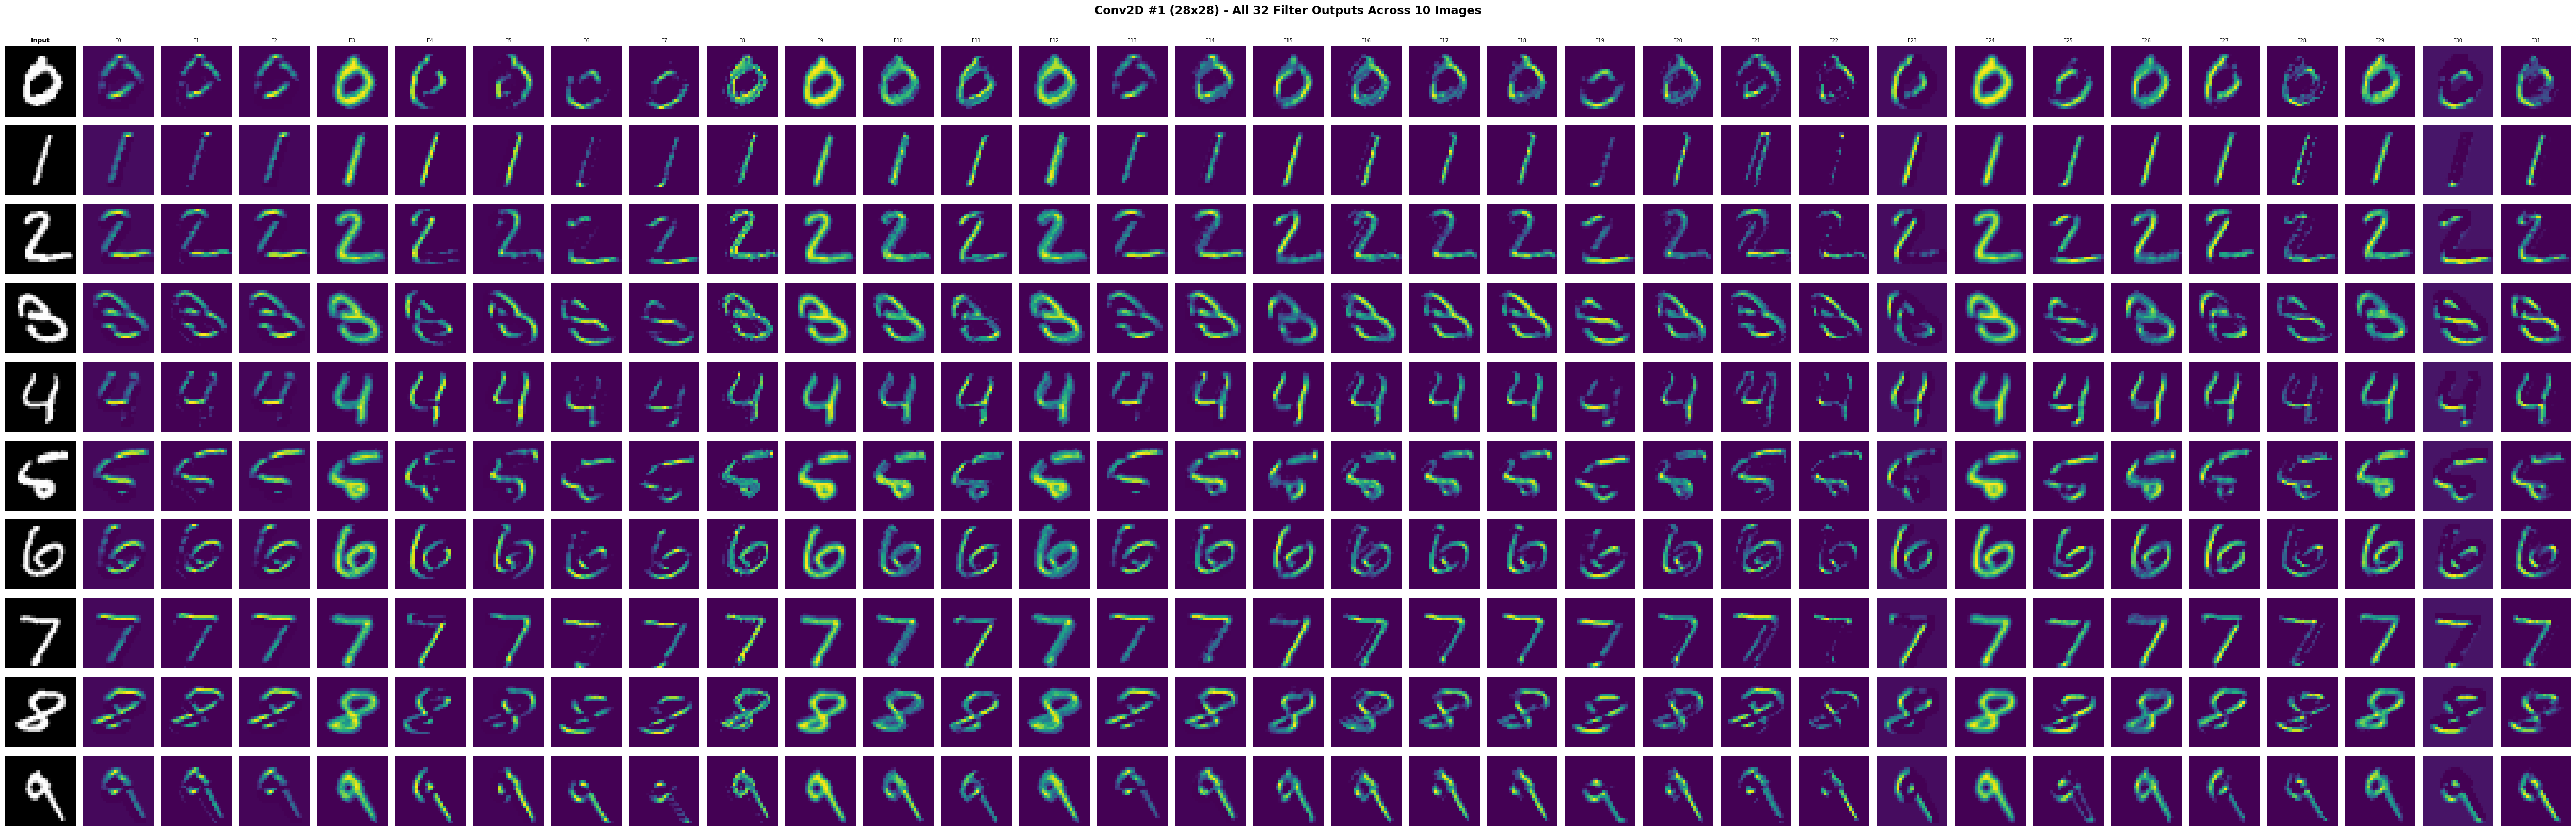

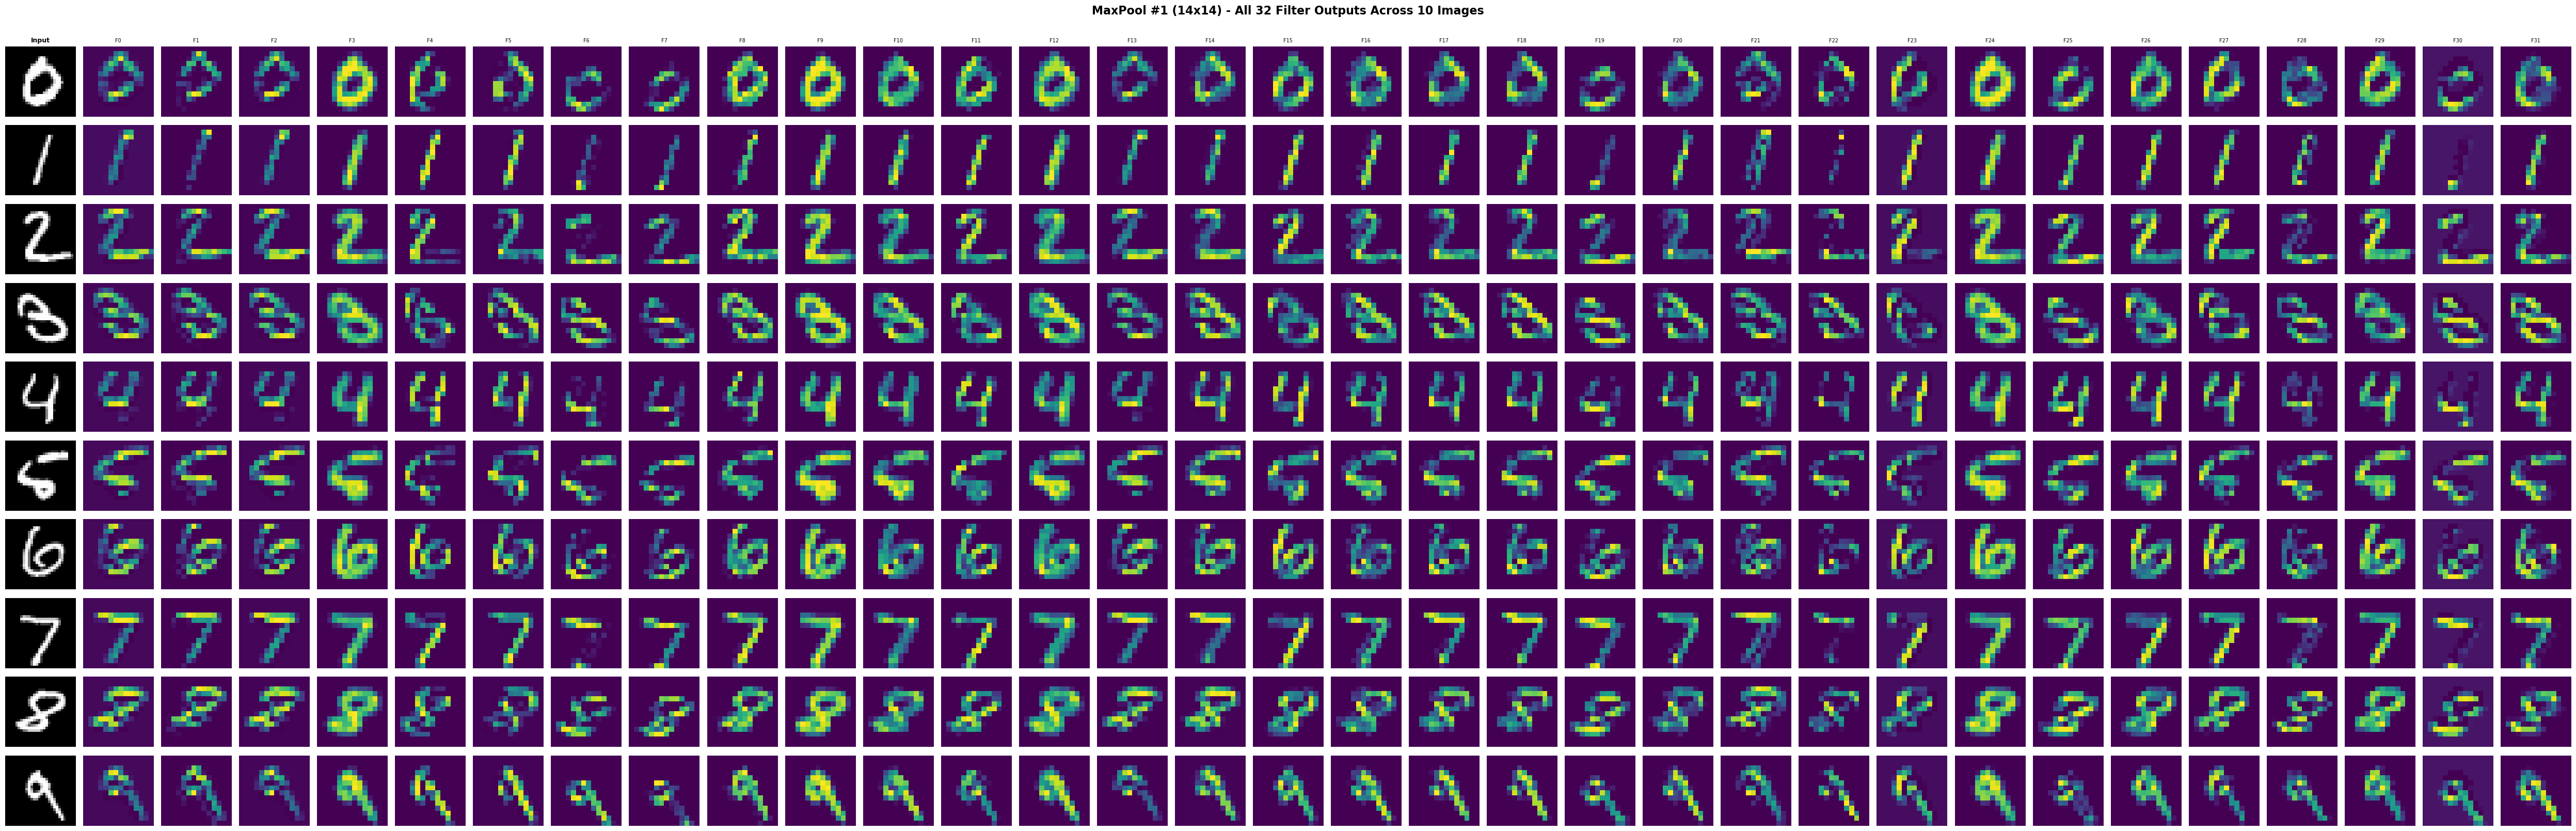

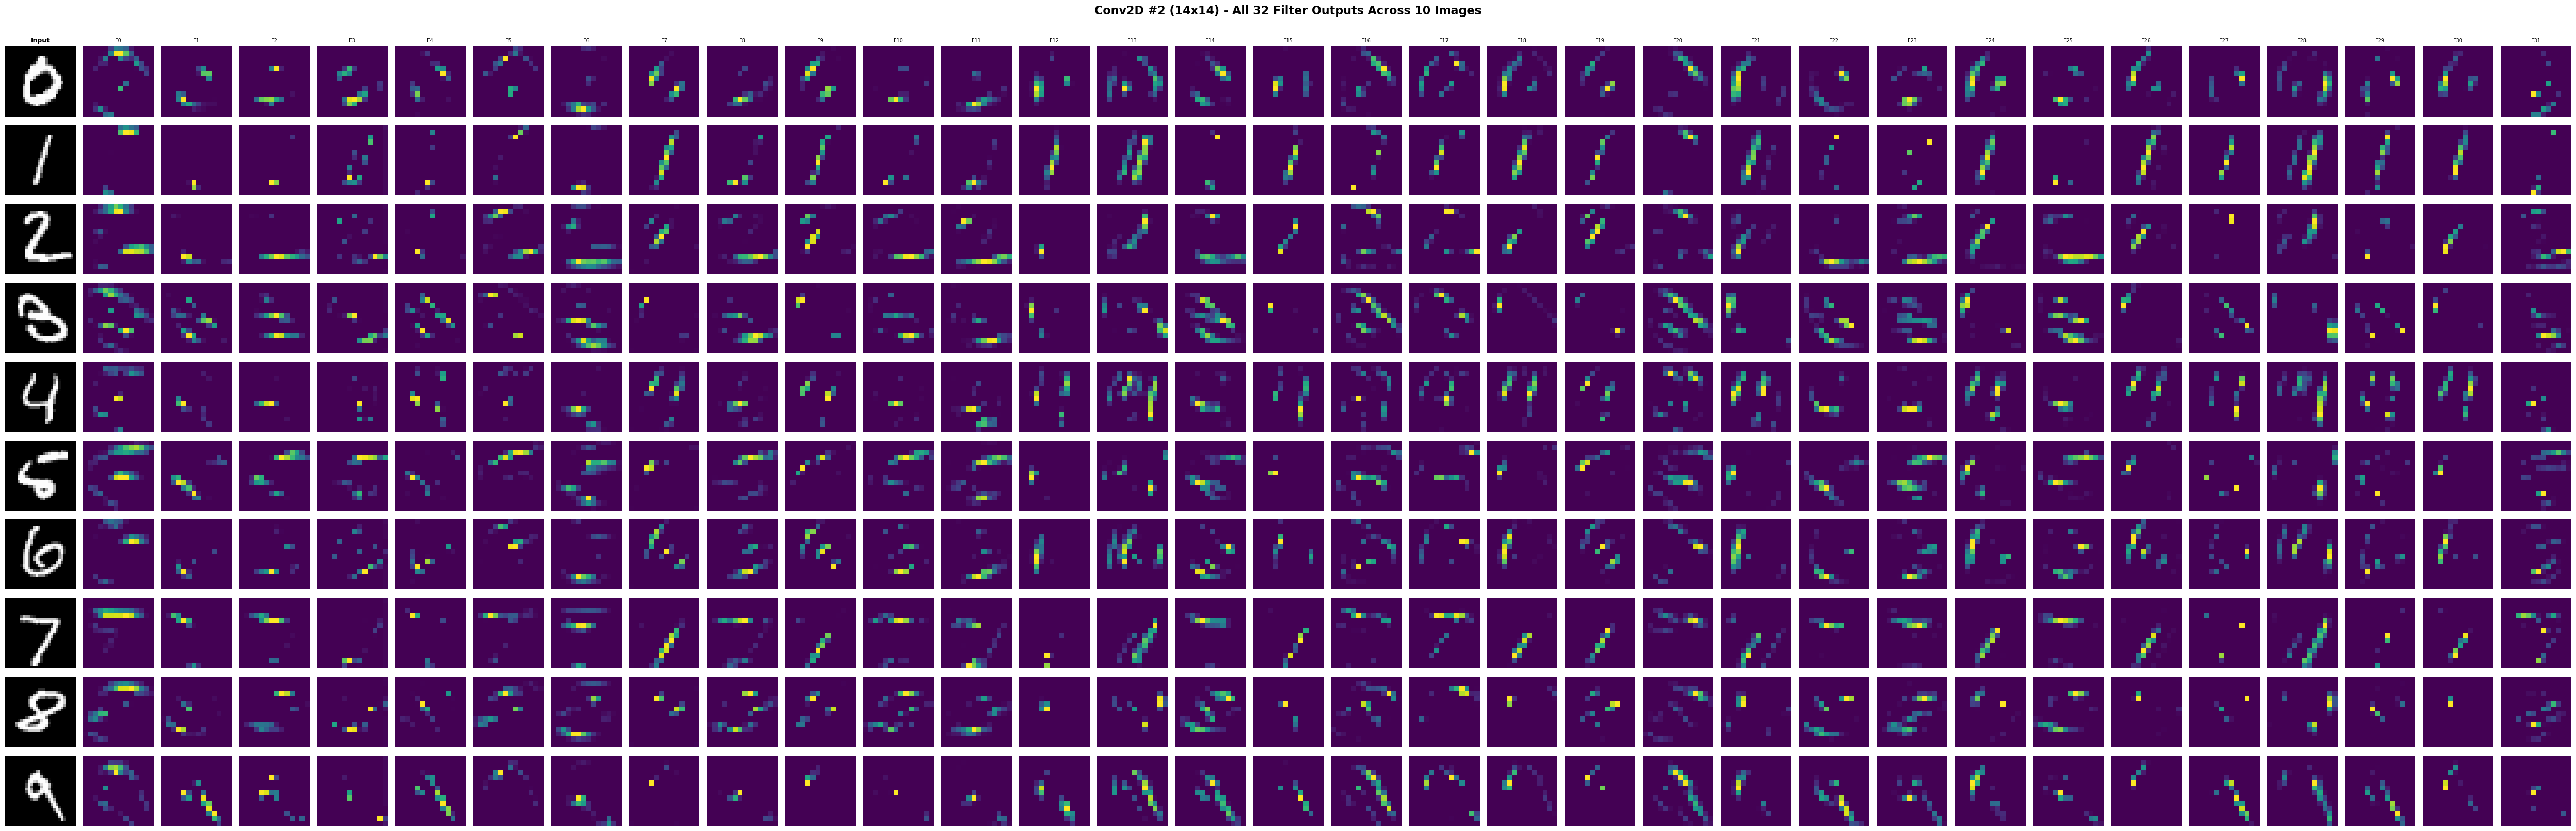

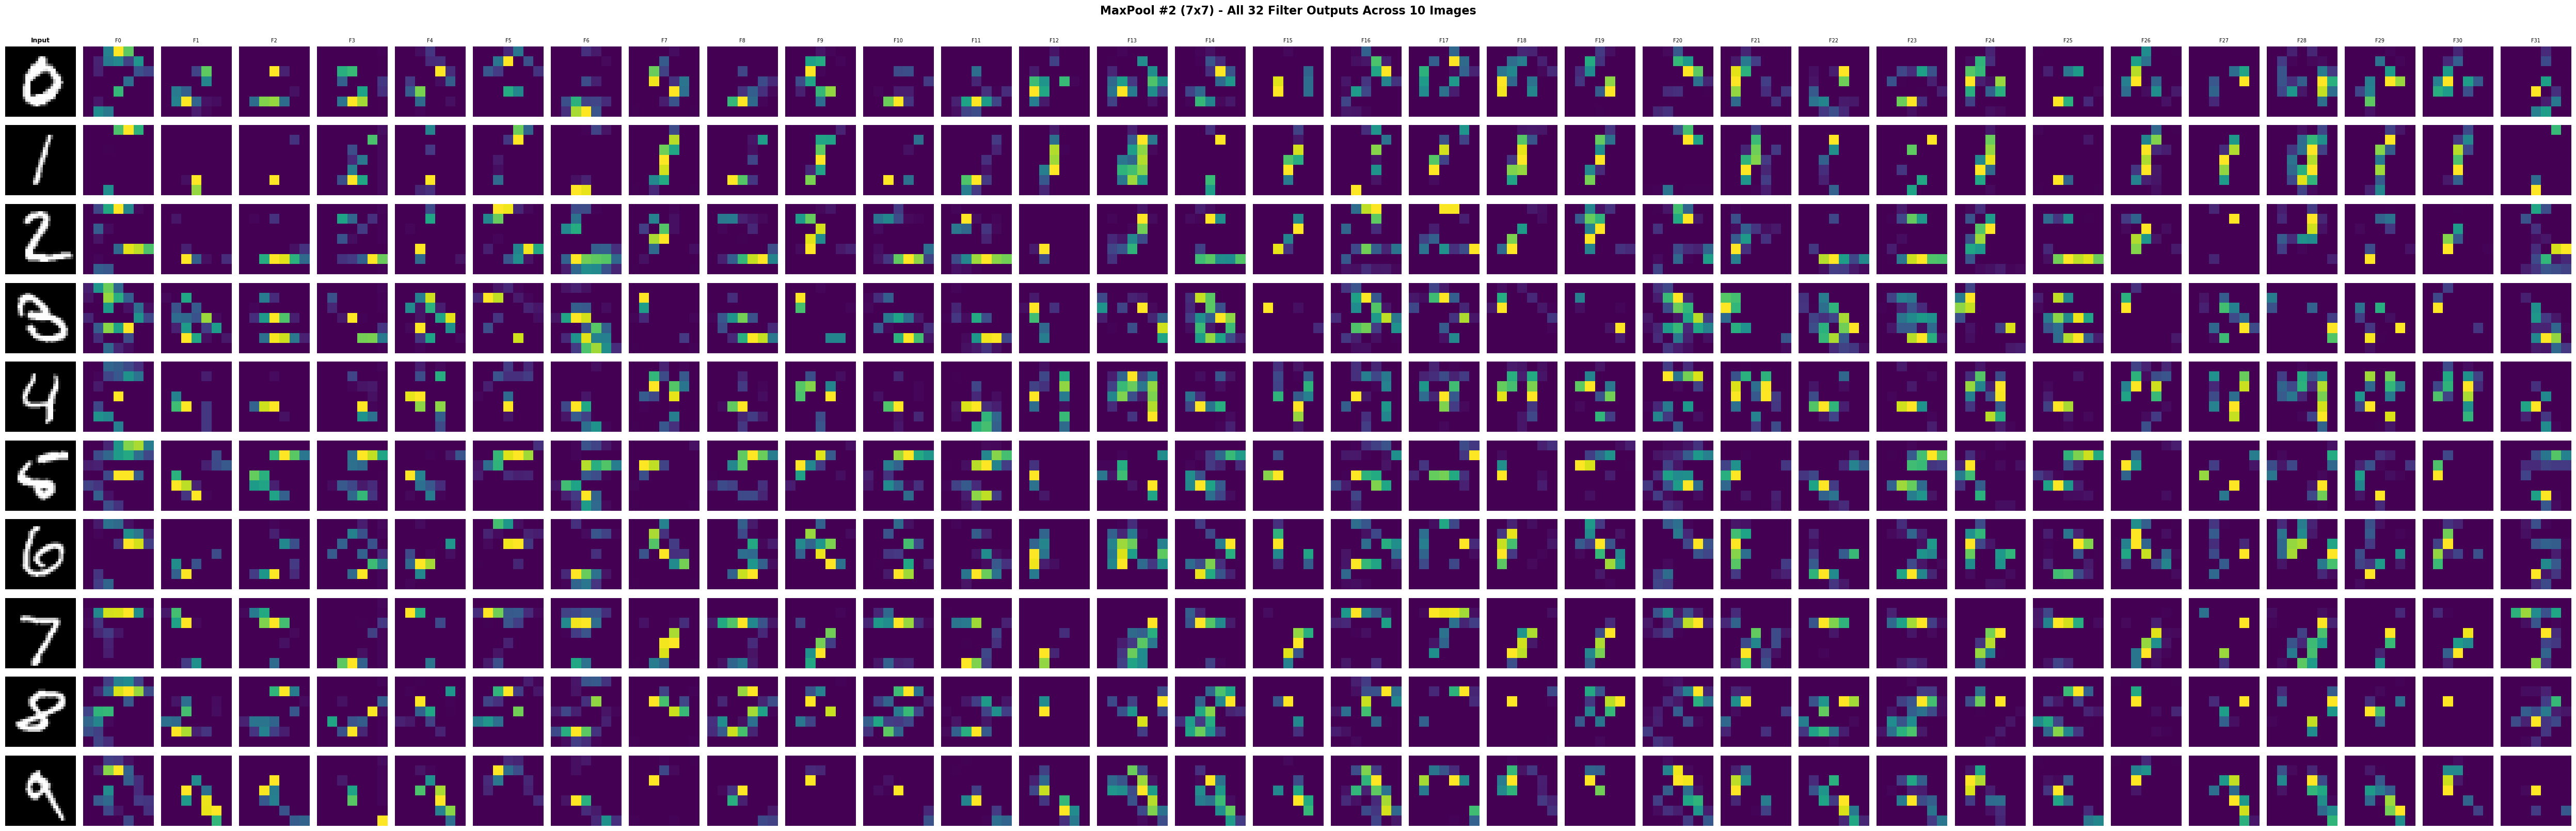

In [129]:
import matplotlib.pyplot as plt
import numpy as np

# Pick one example of each digit 0-9
all_true_labels = np.argmax(y_test, axis=1)
sample_indices = [np.where(all_true_labels == d)[0][0] for d in range(10)]
samples = x_test[sample_indices]
true_labels = all_true_labels[sample_indices]

# Pass each image through the first 4 layers
layer_names = ['Conv2D #1 (28x28)', 'MaxPool #1 (14x14)', 'Conv2D #2 (14x14)', 'MaxPool #2 (7x7)']
all_layer_outputs = []  # [10 images][4 layers]

for i in range(10):
    x = samples[i:i+1]
    img_layers = []
    for layer in model.layers[:4]:
        x = layer(x)
        img_layers.append(x.numpy())
    all_layer_outputs.append(img_layers)

# One figure per layer (4 figures)
# Each figure: 10 rows (images) × 33 columns (original + 32 filters)
# This correctly shows that each layer receives the COMBINED output of the previous layer,
# not a 1:1 mapping of filters across layers.
for layer_idx, layer_name in enumerate(layer_names):
    fig, axes = plt.subplots(10, 33, figsize=(50, 16))

    for row in range(10):
        # Column 0: original image
        axes[row, 0].imshow(samples[row, :, :, 0], cmap='gray')
        axes[row, 0].axis('off')
        if row == 0:
            axes[row, 0].set_title('Input', fontsize=9, fontweight='bold')
        axes[row, 0].set_ylabel(f'Label: {true_labels[row]}', fontsize=9,
                                fontweight='bold', rotation=0, labelpad=50)

        # Columns 1-32: all 32 feature maps from this layer
        for filt in range(32):
            output = all_layer_outputs[row][layer_idx]
            axes[row, filt + 1].imshow(output[0, :, :, filt], cmap='viridis')
            axes[row, filt + 1].axis('off')
            if row == 0:
                axes[row, filt + 1].set_title(f'F{filt}', fontsize=7)

    fig.suptitle(f'{layer_name} - All 32 Filter Outputs Across 10 Images',
                 fontsize=16, fontweight='bold', y=1.005)
    plt.tight_layout()
    plt.show()

## Conclusion and Analysis

### Model Performance
The CNN achieves a **test accuracy of 99.26%** with a test loss of just **0.0231**, misclassifying only **74 out of 10,000** test images (0.74%). With 211,690 trainable parameters trained over 12 epochs, this is a lightweight yet highly effective architecture for the MNIST handwritten digit recognition.

### Layer-by-Layer Feature Analysis

| Layer | Output Shape | Params | Role |
|-------|-------------|--------|------|
| **Conv2D #1** (32 filters, 3x3x1) | 28x28x32 | 320 | Each filter has 3x3x1+1=10 params. Detects low-level features from the single input channel |
| **MaxPool #1** (2x2) | 14x14x32 | 0 | Halves spatial dimensions; retains strongest activations per 2x2 region |
| **Conv2D #2** (32 filters, 3x3x32) | 14x14x32 | 9,248 | Each filter has 3x3x32+1=289 params. Reads **all 32 channels** combined, not individual filters |
| **MaxPool #2** (2x2) | 7x7x32 | 0 | Further reduces to 7x7; compresses into compact spatial summaries |
| **Dropout** (0.25) | 7x7x32 | 0 | Regularization - randomly drops 25% of feature map values during training |
| **Flatten** | 1568 | 0 | Reshapes 7x7x32 feature maps into a single vector for dense layers |
| **Dense** (128, ReLU) | 128 | 200,832 | Learns non-linear combinations of all extracted features for classification |
| **Dropout** (0.5) | 128 | 0 | Aggressive regularization - drops 50% of neurons to prevent overfitting |
| **Dense** (10, Softmax) | 10 | 1,290 | Outputs probability distribution over digits 0-9 |

### Single-Image Analysis (Plot 1: Layer-by-Layer for one sample)

Passing a single digit through all 4 layers reveals how features are progressively extracted:

- **Conv2D #1**: The 32 filters produce 28x28 feature maps that closely trace the digit's shape. Each filter (3x3x1 kernel) specializes in a different **edge orientation** - some highlight horizontal strokes, others vertical or diagonal edges. The digit is still clearly recognizable in most feature maps.

- **MaxPool #1**: Downsamples to 14x14 by keeping the **max value** in each 2x2 window. The edge patterns are preserved but coarser. Some weak activations are discarded, sharpening the contrast between "feature present" and "no feature" regions.

- **Conv2D #2**: Each of these 32 filters operates on a **3x3x32 kernel** - reading from all 32 MaxPool #1 channels simultaneously, then summing across channels into one output map. The resulting feature maps show more **abstract, compound patterns**: standing lines, sleeping lines, lines at a particular angle, curves, junctions, and enclosed regions. The digit's shape is less directly visible - it has been decomposed into higher-order structural components.

- **MaxPool #2**: Compresses to just 7x7, where each cell encodes a ~4x4 pixel region of the original. The feature maps are spatially coarse but semantically rich - enough to discriminate between digit classes.

### Cross-Image Analysis (Plot 2: Same layer across 10 different digits)

Viewing each layer's 32 filter outputs across 10 different input digits reveals how filters generalize:

- **Conv2D #1 across images**: The filters produce tend to extract similar features across all shapes. Even though they the filters still clearly trace the most of the digits shape. 

- **MaxPool #1 across images**: The downsampled edge maps retain the same per-filter specialization. Comparing rows shows that different digits activate **different subsets** of filters - a "1" activates mostly vertical-edge filters, while an "0" activates filters for curves and enclosed shapes.

- **Conv2D #2 across images**: The feature maps become more **digit-discriminative**. Filters that were generic edge detectors in Layer 1 are now combined into patterns that respond differently to "3" vs "8" vs "9". The same filter produces **structurally similar responses** regardless of which digit is shown - e.g., a horizontal-edge filter consistently highlights horizontal strokes in "7", "2", and "5", while remaining dark on vertical-only regions. This confirms filters learn **universal low-level features**, not digit-specific patterns. Some filters appear nearly blank for certain digits - they've learned features irrelevant to that particular shape, effectively creating a **sparse, selective encoding**.

- **MaxPool #2 across images**: At 7x7, the representations look quite different across digits - this is where the network has built **distinct spatial fingerprints** for each digit class. The dense layers downstream can now easily separate these compact codes into the 10 output classes.

### How Channels Are Combined Between Layers

A critical insight from the visualizations: **Conv2D #2 does NOT receive filters 1:1 from Conv2D #1**. Each Conv2D #2 filter reads the **full 32-channel volume** from MaxPool #1:

```
Conv2D #1 -> 32 feature maps -> MaxPool #1 -> 32 channels --+
                                                             +--> Conv2D #2 Filter 0 (3x3x32 kernel -> SUM -> 1 map)
                                                             +--> Conv2D #2 Filter 1 (3x3x32 kernel -> SUM -> 1 map)
                                                             +--> ...
                                                             +--> Conv2D #2 Filter 31 (3x3x32 kernel -> SUM -> 1 map)
```

This is why Conv2D #2 has **9,248 params** (vs 320 for Conv2D #1) - each filter must learn 3x3x32=288 weights to combine all input channels, plus 1 bias.

### Error Analysis
The 74 misclassified samples are overwhelmingly **ambiguous even to the human eye** - digits with unusual slants, incomplete strokes, or stylistic similarities to other classes (e.g., a poorly written "7" resembling a "1", or a distorted "6" looking like a "0"). This suggests the model has reached near-human performance on this dataset, with remaining errors driven by genuine label ambiguity rather than model limitations.

### Key Takeaways
1. **Hierarchical feature extraction** is the core strength of CNNs - early layers detect simple edges, deeper layers compose them into complex patterns, and dense layers map those patterns to class predictions.
2. **Channel combination** is how CNNs build complexity - Conv2D #2's filters each read all 32 channels from the previous layer, learning weighted combinations of edge patterns into higher-order features.
3. **MaxPooling** plays a dual role: it reduces computational cost (28x28 -> 14x14 -> 7x7) and introduces **translation invariance**, making the model tolerant to small shifts in digit position.
4. **Dropout at two stages** (0.25 after convolutions, 0.5 after dense) effectively regularizes the model, as evidenced by the small gap between training and validation accuracy.
5. A relatively simple 2-layer CNN with just **211K parameters** is sufficient to achieve >99% accuracy on MNIST, demonstrating the efficiency of convolutional architectures for image classification tasks.